In [1]:
import pandas as pd
from pandas import Series
import nltk
import string
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk import ngrams

import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Using RNN

In [2]:
#This code was done on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
textdata = pd.read_csv('/content/drive/My Drive/GSU/Fall 2020/Advanced Deep Learning/HW 2/labeled.csv')

In [3]:
messages = textdata.dropna()

In [4]:
#Get rid of sentences longer than 4000 words
messages = messages[messages['Clean'].str.len().lt(4000)]

In [5]:
# Read in data and split into training and test set (once labeled) and fix naming.
X_train, X_test, y_train, y_test = train_test_split(messages['Clean'], messages['labeln'], test_size = 0.1)

In [6]:
print('# of X_train: ', len(X_train))
print('# of X_test: ', len(X_test))

# of X_train:  106475
# of X_test:  11831


In [16]:
#Setup dummies for the result 

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

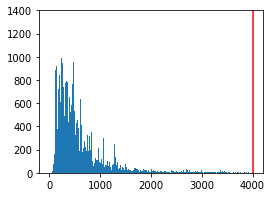

In [7]:
import matplotlib.pyplot as plt
max_sequence_len = max([len(x) for x in X_train])
plt.figure(figsize=(4,3))
plt.hist([len(x) for x in X_train], bins=1000)
plt.axvline(max_sequence_len, c="r")
#plt.title("Positive Review Sequence Length")
plt.show()

In [8]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [9]:
# Use tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [10]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 4001)
X_test_seq_padded = pad_sequences(X_test_seq, 4001)

In [20]:
# Construct a simple RNN model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 30))
model.add(LSTM(30, dropout=0, recurrent_dropout=0))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 30)          599790    
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                465       
Total params: 608,505
Trainable params: 608,505
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy']) 

In [22]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, batch_size=32, epochs=1, validation_data=(X_test_seq_padded, y_test))

3328/3328 [==============================] - 431s 130ms/step - loss: 0.1153 - accuracy: 0.6655 - val_loss: 0.0286 - val_accuracy: 0.9435
